In [14]:
"""
This notebook provides some tools to visualize the log data. 
Run sim_advanced.py before running this notebook. 
We assume logs are stored in folder named "logs" and are named as in README.md
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in log files
log0 = pd.read_csv('logs/0.txt', names=['Event', 'ID', 'Data', 'Clock', 'Time'])
log1 = pd.read_csv('logs/1.txt', names=['Event', 'ID', 'Data', 'Clock', 'Time'])
log2 = pd.read_csv('logs/2.txt', names=['Event', 'ID', 'Data', 'Clock', 'Time'])
log0.head()

,Event,ID,Data,Clock,Time
0,sent,0,2,1,1.677940e+09
1,recv,0,0,2,1.677940e+09
2,recv,0,0,5,1.677940e+09
3,recv,0,0,7,1.677940e+09
4,recv,0,0,8,1.677940e+09


In [15]:
# Set the time to start from 0
log0['Time'] = log0['Time'] - log0['Time'].min()
log1['Time'] = log1['Time'] - log1['Time'].min()
log2['Time'] = log2['Time'] - log2['Time'].min()
log0.head()

,Event,ID,Data,Clock,Time
0,sent,0,2,1,0.000000
1,recv,0,0,2,0.999273
2,recv,0,0,5,1.999820
3,recv,0,0,7,3.000505
4,recv,0,0,8,4.001132


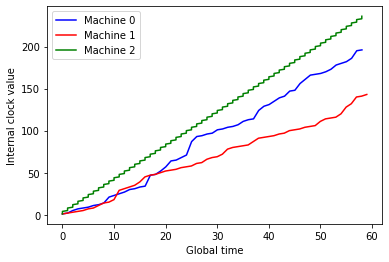

In [16]:
# Visualize the drift between the machines
ax = log0.plot(kind="line", x="Time",y="Clock", color="b", label="Machine 0")
log1.plot(x="Time",y="Clock", color="r", label="Machine 1", ax=ax)
log2.plot(x="Time",y="Clock", color="g", label="Machine 2", ax=ax)

ax.set_xlabel("Global time")
ax.set_ylabel("Internal clock value")
plt.show()

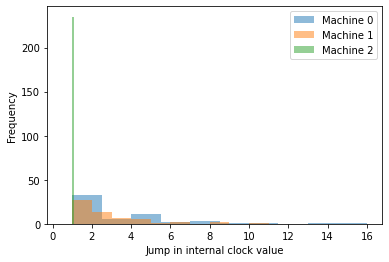

In [28]:
# Visualize the jump in internal clock values for different machines
plt.hist(log0['Clock'].diff(), alpha=0.5, label='Machine 0')
plt.hist(log1['Clock'].diff(), alpha=0.5, label='Machine 1')
plt.hist(log2['Clock'].diff(), alpha=0.5, label='Machine 2')

plt.xlabel("Jump in internal clock value")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()